Landmark Based Registration

In [13]:
import matplotlib.pyplot as plt
import math
from skimage.transform import rotate
from skimage.transform import EuclideanTransform
from skimage.transform import SimilarityTransform
from skimage.transform import warp
from skimage.transform import swirl
from skimage import io
import skimage
import numpy as np
from skimage import color, io, measure, img_as_float, img_as_ubyte # type: ignore
from skimage.transform import EuclideanTransform, matrix_transform


In [14]:
# Read the images
src_img = io.imread('data/Hand1.jpg')
dst_img = io.imread('data/Hand2.jpg')

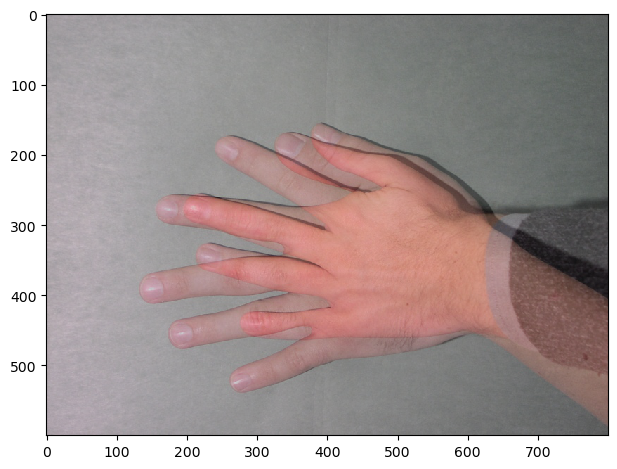

In [15]:
# Overlap of the images
blend = 0.5 * skimage.img_as_float(src_img) + 0.5 * skimage.img_as_float(dst_img)
io.imshow(blend)
io.show()


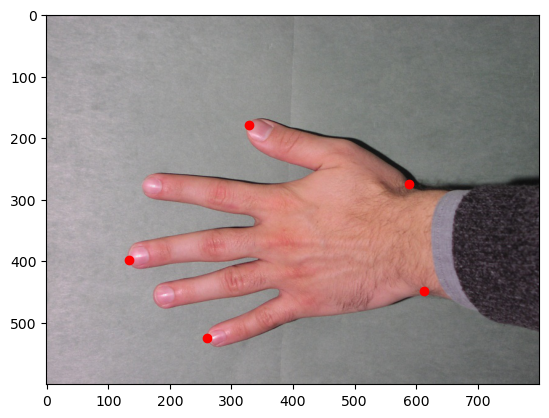

In [16]:
# Landmarks in the source image
src = np.array([[588, 274], [328, 179], [134, 398], [260, 525], [613, 448]])

plt.imshow(src_img)
plt.plot(src[:, 0], src[:, 1], '.r', markersize=12)
plt.show()

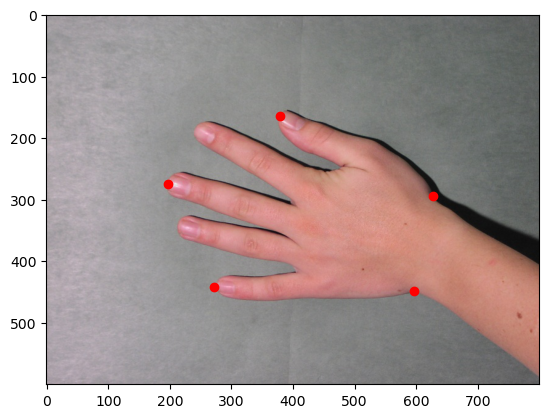

In [17]:
# Landmarks in the destination image
dst = np.array([[627, 294], [378, 164], [197, 275], [272, 441], [597, 448]])

plt.imshow(dst_img)
plt.plot(dst[:, 0], dst[:, 1], '.r', markersize=12)
plt.show()

In [18]:
# Similarity
e_x = src[:, 0] - dst[:, 0]
error_x = np.dot(e_x, e_x)
e_y = src[:, 1] - dst[:, 1]
error_y = np.dot(e_y, e_y)
f = error_x + error_y
print(f"Landmark alignment error F: {f}")

Landmark alignment error F: 31200


In [19]:
# Optimal euclidean transform
tform = EuclideanTransform()
tform.estimate(src, dst)

# Apply the transformation to the source image
src_transform = matrix_transform(src, tform.params)

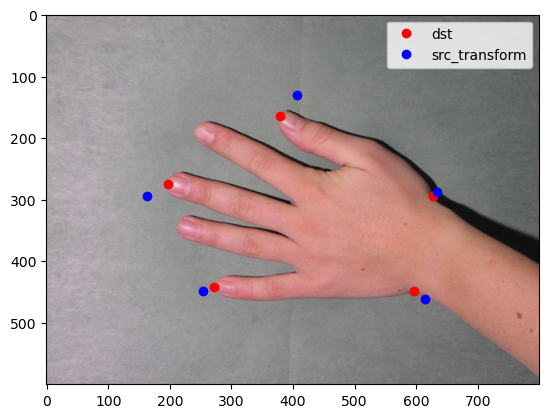

In [20]:
# Visualize the transformed landmarks with the destination image
plt.imshow(dst_img)
plt.plot(dst[:, 0], dst[:, 1], '.r', markersize=12)
plt.plot(src_transform[:, 0], src_transform[:, 1], '.b', markersize=12)
# Add legend and show plot
plt.legend(['dst', 'src_transform'])
plt.show()

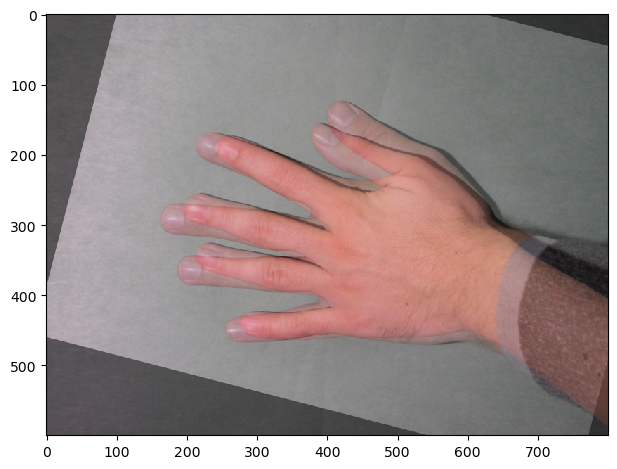

In [21]:
# Apply the transformation to the source image
src_transform_im = warp(src_img, tform.inverse)

# Overlap of the images
blend = 0.5 * skimage.img_as_float(dst_img) + 0.5 * skimage.img_as_float(src_transform_im)
io.imshow(blend)
io.show()


In [23]:
# Similarty of the transformed image with the destination image
e_x = src_transform[:, 0] - dst[:, 0]
error_x = np.dot(e_x, e_x)
e_y = src_transform[:, 1] - dst[:, 1]
error_y = np.dot(e_y, e_y)
f = error_x + error_y
print(f"Landmark alignment error F: {f}")

Landmark alignment error F: 4396.203637630954
